## Student Performance Indicator 

**Life cycle of Machine Leaning Project**
- Understanding the Problem Statement 
- Data Collection 
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing 
- Model Training 
- Choose best model 

## 1) Problem Statement 
- This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection 
- Dataset source :- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows 

### 2.1) Import Data and Required Packages 
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library. 

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [4]:
df = pd.read_csv('Data/stud.csv')

**Show Top 5 Records**

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the Dataset**

In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
print("Categories in 'gender' variable:'", end=' ')
print(df['gender'].unique(), end='\n\n')
print("Categories in 'race_ethnicity:'", end=' ')
print(df['race_ethnicity'].unique(), end='\n\n')
print("Categories in 'parental_level_of_education:'", end=' ')
print(df['parental_level_of_education'].unique(), end='\n\n')
print("Categories in 'lunch':'", end=' ')
print(df['lunch'].unique(), end='\n\n')
print("Categories in 'test_preparation_course:'", end=' ')
print(df['test_preparation_course'].unique(), end='\n')

Categories in 'gender' variable:' ['female' 'male']

Categories in 'race_ethnicity:' ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental_level_of_education:' ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch':' ['standard' 'free/reduced']

Categories in 'test_preparation_course:' ['none' 'completed']


### 2.2) Dataset information 
- gender : sex of students -> (Male/Female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : Having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test 
- math score 
- reading score 
- writing score 

## 3. Data Checks to perform 
- check Missing values 
- Check Duplicates 
- Check data type 
- Check the number of unique values of each column 
- Check statistics of data set
- Check various categories present in the different categorical column 

### 3.1) Check Missing values 

In [13]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

### 3.2) Check Duplicates

In [14]:
df.duplicated().sum()

0

**There is no duplicates values in the test set**
### 3.3) check data types 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column 

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5) Check statistics of data set 

In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- From above description of numerical data, all means are very close to each other - between 66 and 68.5:
- All standard deviation are also close - between 14.6 and 15.18
- while there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7) Exploring Data


In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
print("Categories in 'gender' variable:'", end=' ')
print(df['gender'].unique(), end='\n\n')
print("Categories in 'race_ethnicity:'", end=' ')
print(df['race_ethnicity'].unique(), end='\n\n')
print("Categories in 'parental_level_of_education:'", end=' ')
print(df['parental_level_of_education'].unique(), end='\n\n')
print("Categories in 'lunch':'", end=' ')
print(df['lunch'].unique(), end='\n\n')
print("Categories in 'test_preparation_course:'", end=' ')
print(df['test_preparation_course'].unique(), end='\n')

Categories in 'gender' variable:' ['female' 'male']

Categories in 'race_ethnicity:' ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental_level_of_education:' ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch':' ['standard' 'free/reduced']

Categories in 'test_preparation_course:' ['none' 'completed']


In [21]:
# Define numerical & Categorical columns
numerical_columns = [col for col in df.columns if df[col].dtype != 'O']
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']

# Print Columns 
print(f'We have {len(numerical_columns)} numerical features : {numerical_columns}')
print(f'We have {len(categorical_columns)} Categorical features : {categorical_columns}')

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8) Adding columns for "Total Score" and Average 

In [22]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [26]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20  marks in Maths: {math_less_20}')
print(f'Number of students with less than 20  marks in writing: {writing_less_20}')
print(f'Number of students with less than 20  marks in reading: {reading_less_20}')


Number of students with less than 20  marks in Maths: 4
Number of students with less than 20  marks in writing: 3
Number of students with less than 20  marks in reading: 1


**Insights**
- From above values we get students have performed the worst in Maths 
- Best performance is in reading section 

## 4 Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram 
- Kernel Distribution Function (KDE)

**4.1.1 Histogram & KDE**

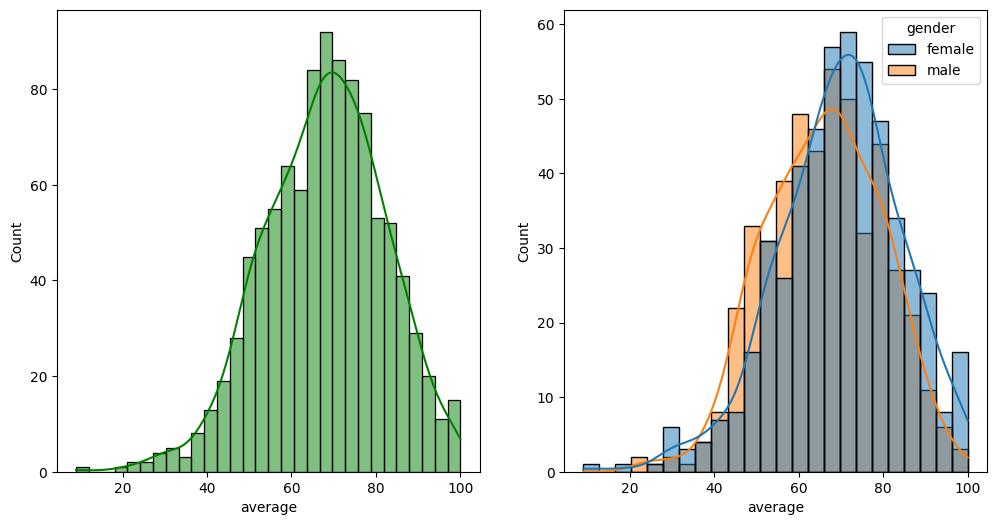

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

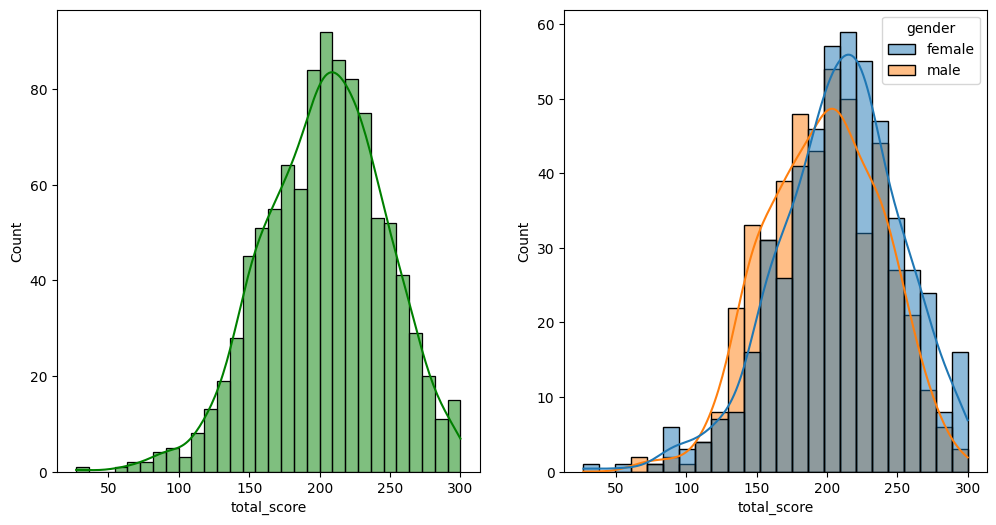

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

**Insights**
- Female students tend to perform well then male students. 

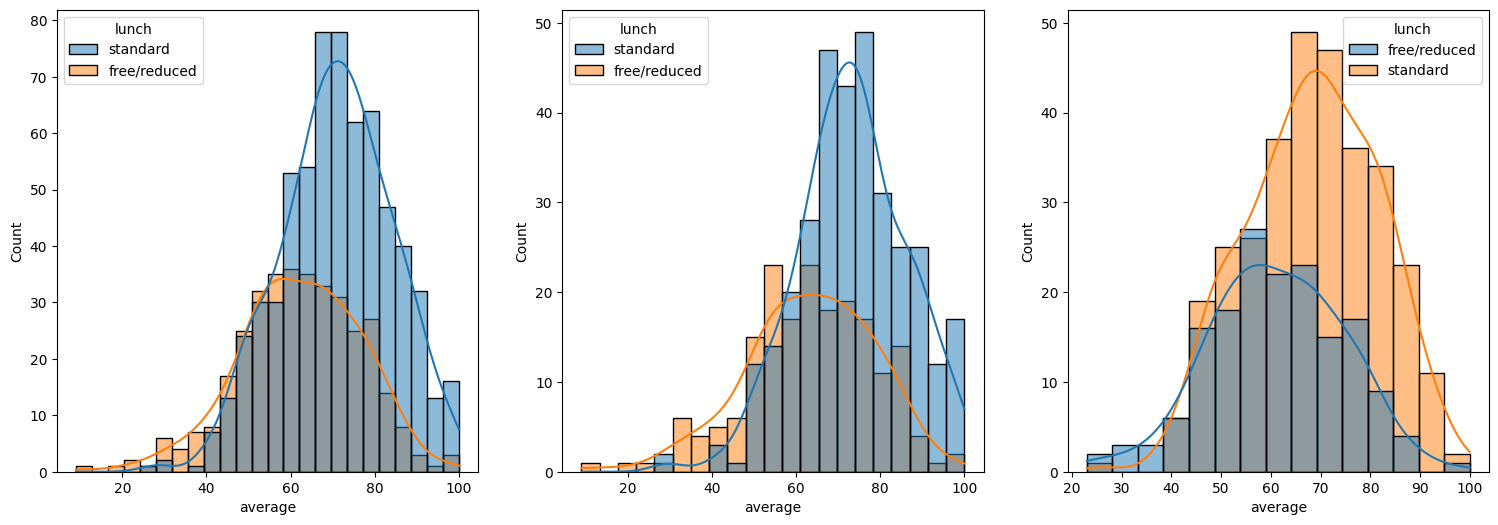

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights**
- Standard lunch helps perform well in exams. 
- Standard lunch helps well in exams be it a male or a female 

In [36]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

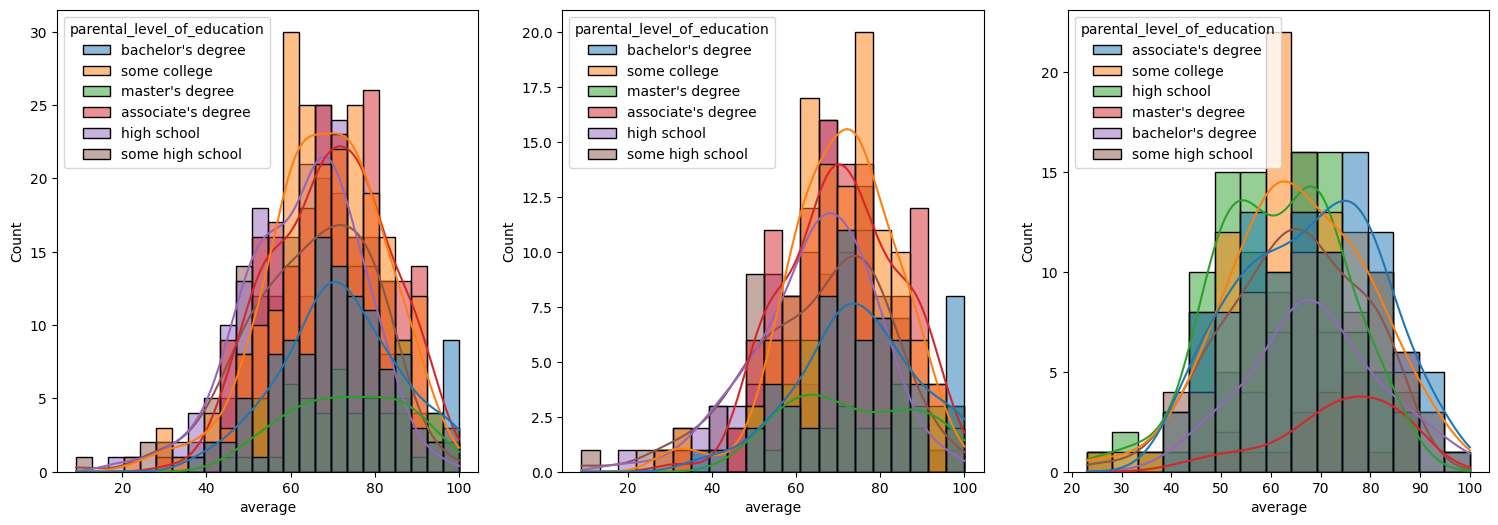

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

**Insights**
- In general parent's education don't help student perform well in exam. 
- 2rd plot we can see there is no effect of parent's education on female students. 
- 3nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

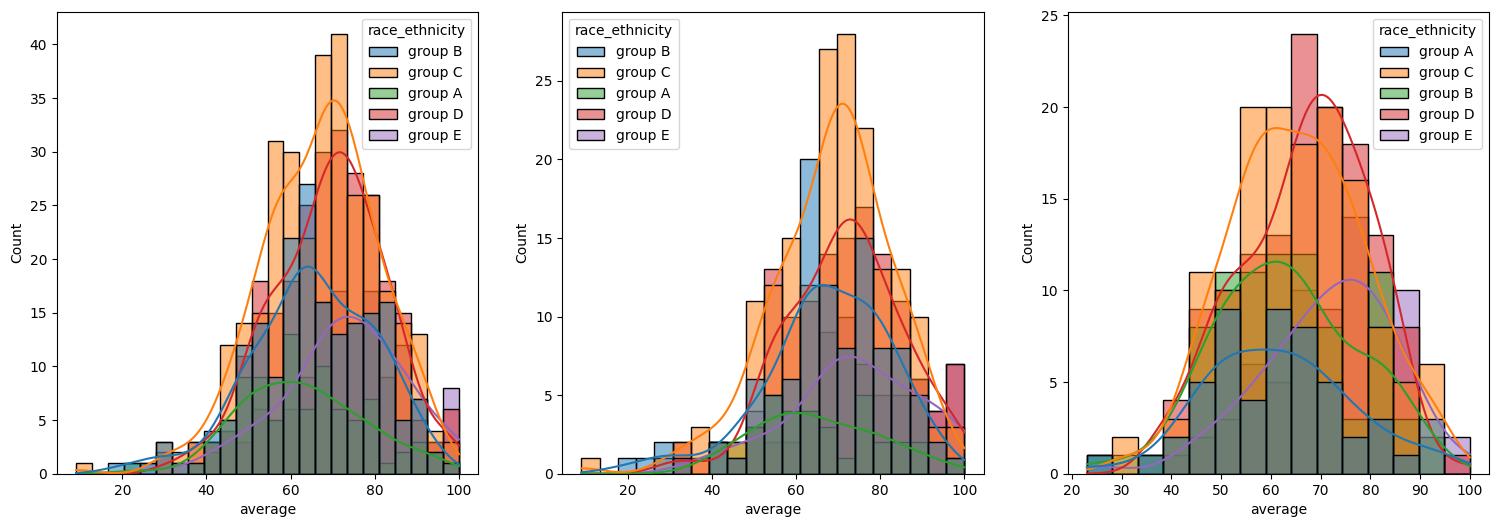

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

**Insights**
- Students of group A and group B tends to perform poorly in exam. 
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female. 

### 4.2 Maximumum score of students in all three subjects.

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

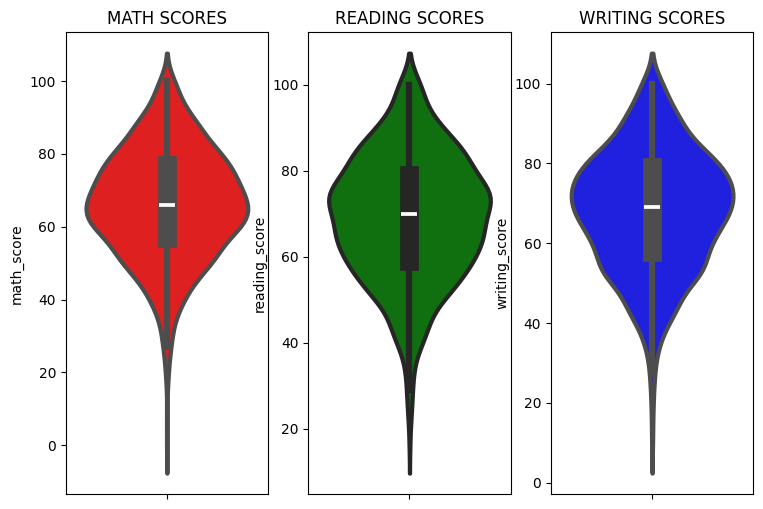

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(142)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

**Insights**
- From the above three plots its clearly visible that most of the students in between 60-80 in Maths whereas in reading and writing most of them score from 50-80. 

### 4.3 Multivariate analysis using pieplot

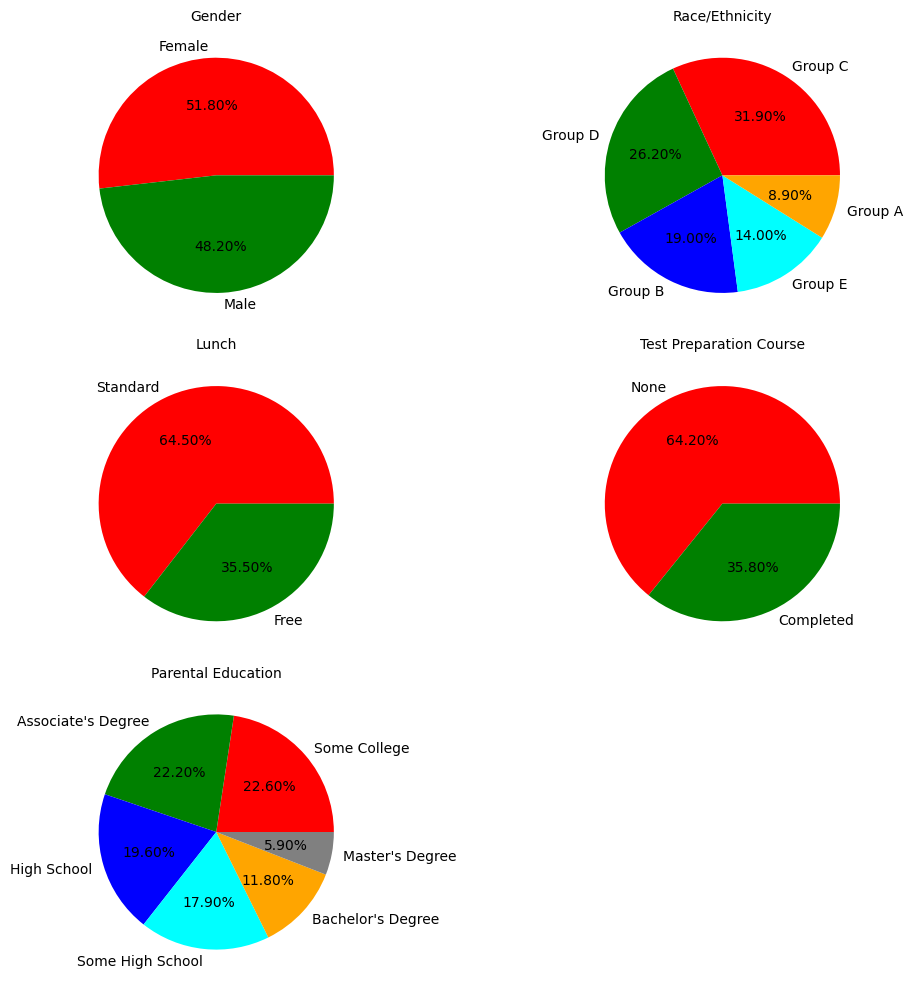

In [61]:
import matplotlib.pyplot as plt

# Adjust the figure size
plt.rcParams['figure.figsize'] = (10, 10)

# Subplot 1: Gender
plt.subplot(3, 2, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=10)
plt.axis('off')

# Subplot 2: Race/Ethnicity
plt.subplot(3, 2, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=10)
plt.axis('off')

# Subplot 3: Lunch
plt.subplot(3, 2, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=10)
plt.axis('off')

# Subplot 4: Test Preparation Course
plt.subplot(3, 2, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Test Preparation Course', fontsize=10)
plt.axis('off')

# Subplot 5: Parental Level of Education
plt.subplot(3, 2, 5)
size = df['parental_level_of_education'].value_counts()
labels = [
    'Some College', "Associate's Degree", 'High School', 
    'Some High School', "Bachelor's Degree", "Master's Degree"
]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Parental Education', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()

**Insights**
- Number of Male and Female students is almost equal 
- Number students are greatest in Group C then Group D
- Number of students who have standard lunch are greater 
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "some College" is greater followed closely by "Associate's Degree" 

#### 4.4 Feature Wise Visualization 
##### 4.4.1 Gender column 
- How is distribution of Gender?
- Is gender has any impact on student's performance? 

#### Univariate Analysis (How distribution of Gender?)

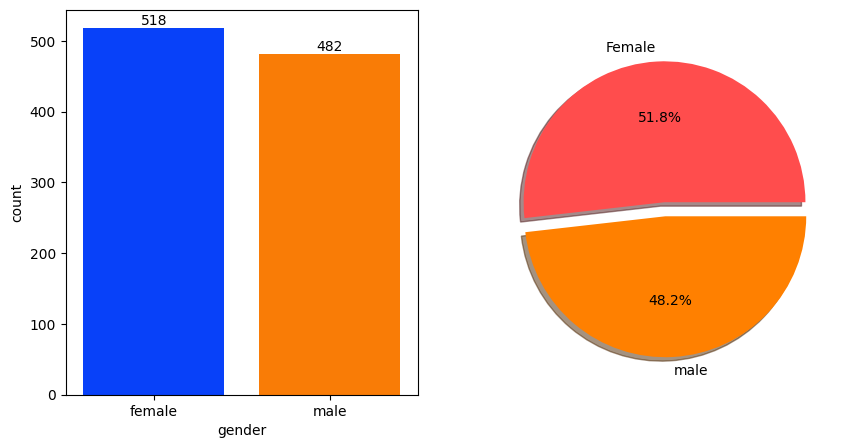

In [72]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=df, x=df['gender'], palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)
    
plt.pie(data=df, x = df['gender'].value_counts(), labels=['Female', 'male'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
- Gender has balanced data with female students are 518(51.8%) and male students are 482(52%)

#### Bivariate Analysis (Is gender has any impact on studet's performance?)

In [77]:
gender_group = df.groupby('gender')['total_score'].mean()
gender_group

gender
female    208.708494
male      197.512448
Name: total_score, dtype: float64

In [86]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Group by gender and calculate the mean of numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


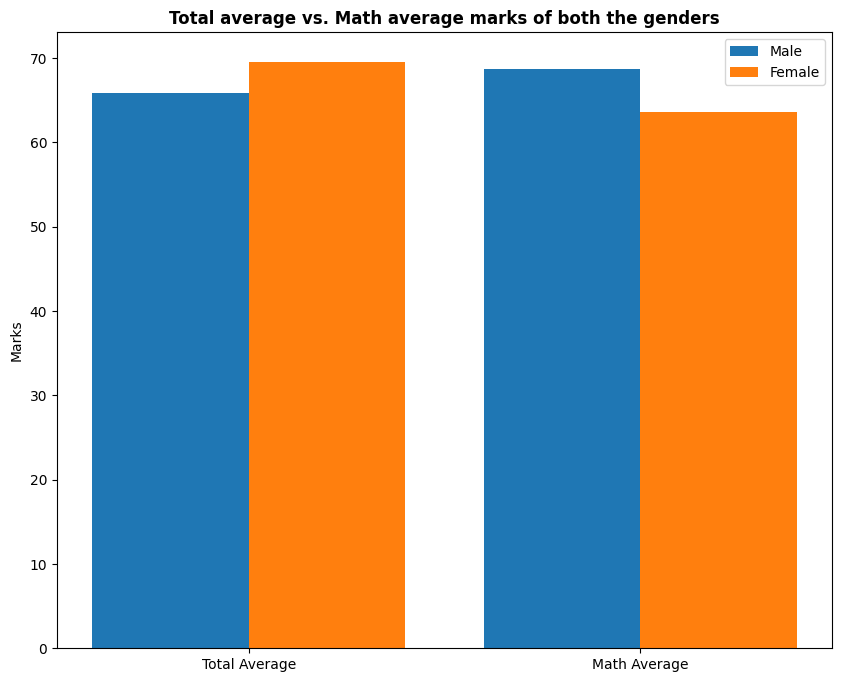

In [88]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Extract scores from the DataFrame
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs. Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
- On an average females have a better overall score than men 
- whereas males have scored higher in Maths.

##### 4.4.2 RACE_EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race_Ehnicity has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)


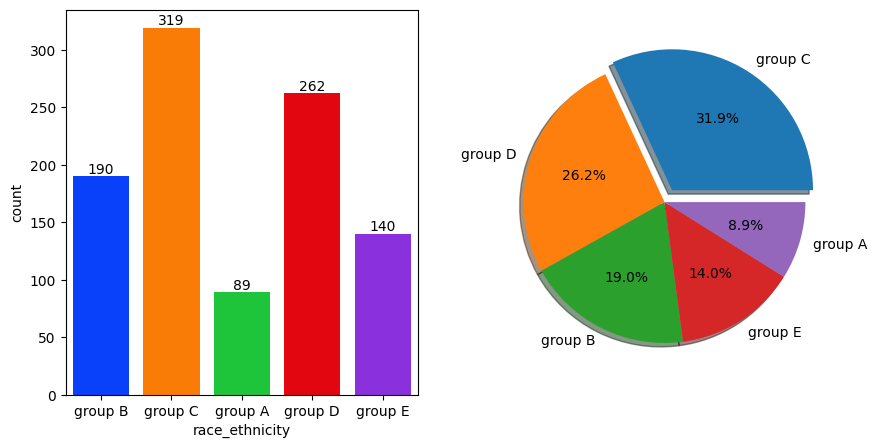

In [91]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Insight** 
- Most of the student belonging from group C/group D.
- Lowest number of students belong to groupA

#### Bivariate Analysis ( Is Race_ehnicity has any impact on student's performance?)

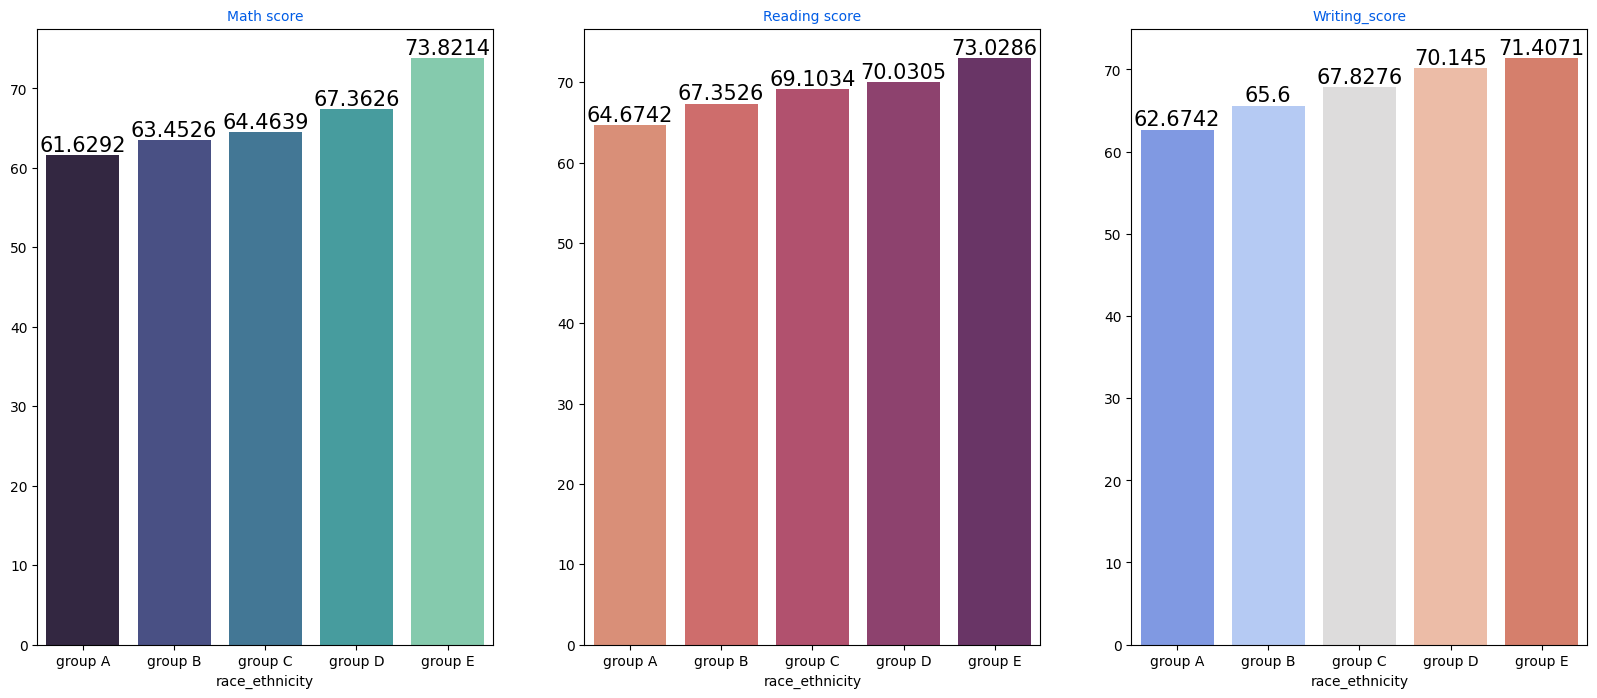

In [94]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=10)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=10)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=10)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insigths**
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects. 

#### 4.4.3 Parental level education column
- What is educational background of student's parent?
- Is parent education has any impact on student's performance?

#### Univariate Analysis (what is education background of student's parent?)

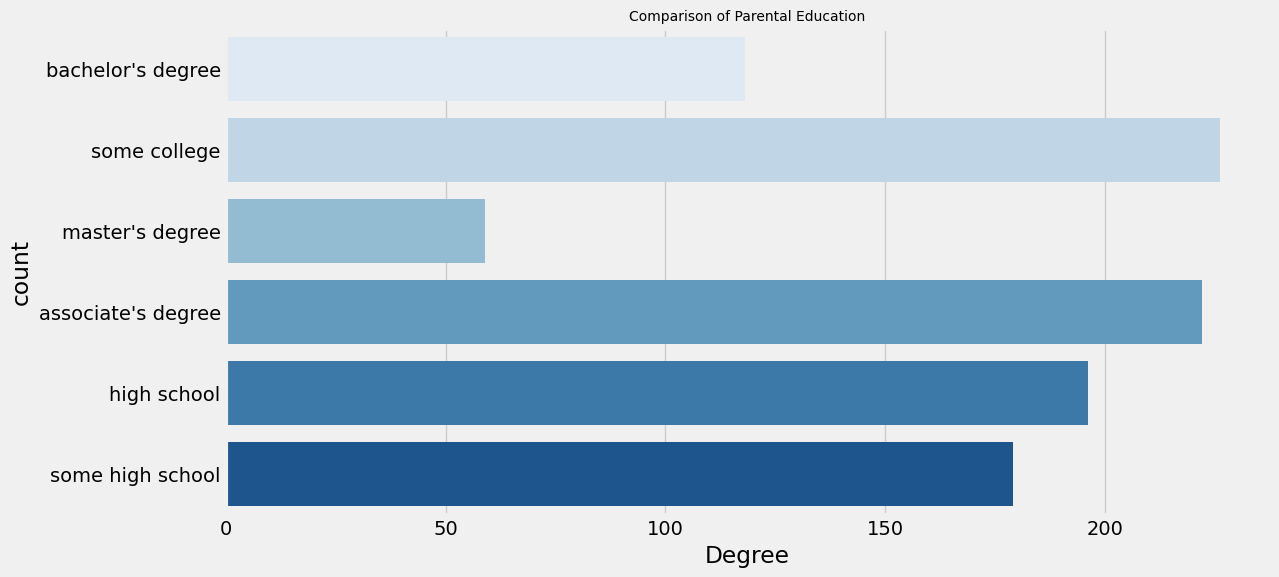

In [97]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 15, fontsize = 10)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insight** 
- Largest number of parents are from some college.

#### Bivariate Analysis (Is parental education has any impact on student's performance?)

In [99]:
umeric_columns = df.select_dtypes(include=[np.number]).columns

# Group by 'parental_level_of_education' and calculate the mean of numeric columns
parental_education_group = df.groupby('parental_level_of_education')[numeric_columns].mean()


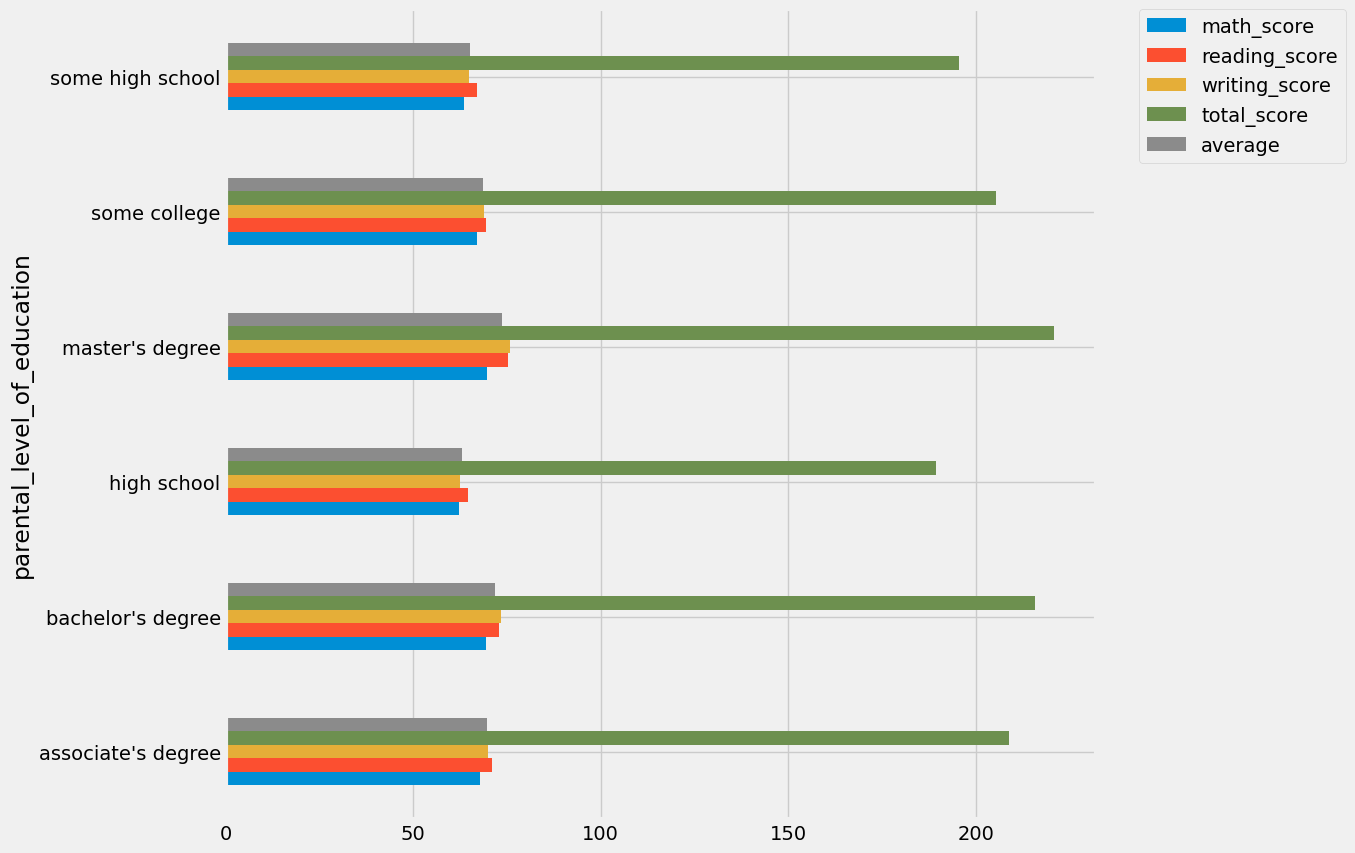

In [100]:
df.groupby('parental_level_of_education')[numeric_columns].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insight**
- The score of student whose parents possess master and bachelor level education are higher than others. 

#### 4.4.4 Lunch column 
- Which type of lunch is most common amoung students?
- what is the effect of lunch type on test results?

#### Univariate Analysis (which type of lunch is most common amoung students?)

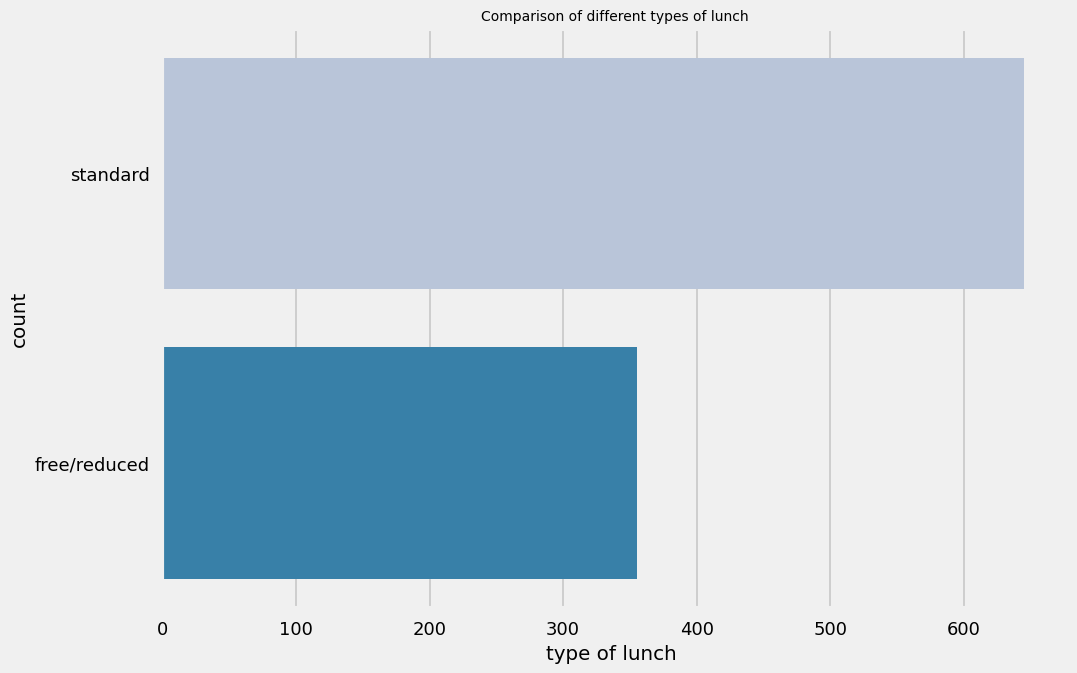

In [102]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=15, fontsize=10)
plt.xlabel('type of lunch ')
plt.ylabel('count')
plt.show()


**Insights**
Student being served Standard lunch was more than free lunch 

#### Bivariate Analysis (Is lunch type intake has any impact on student's performace)

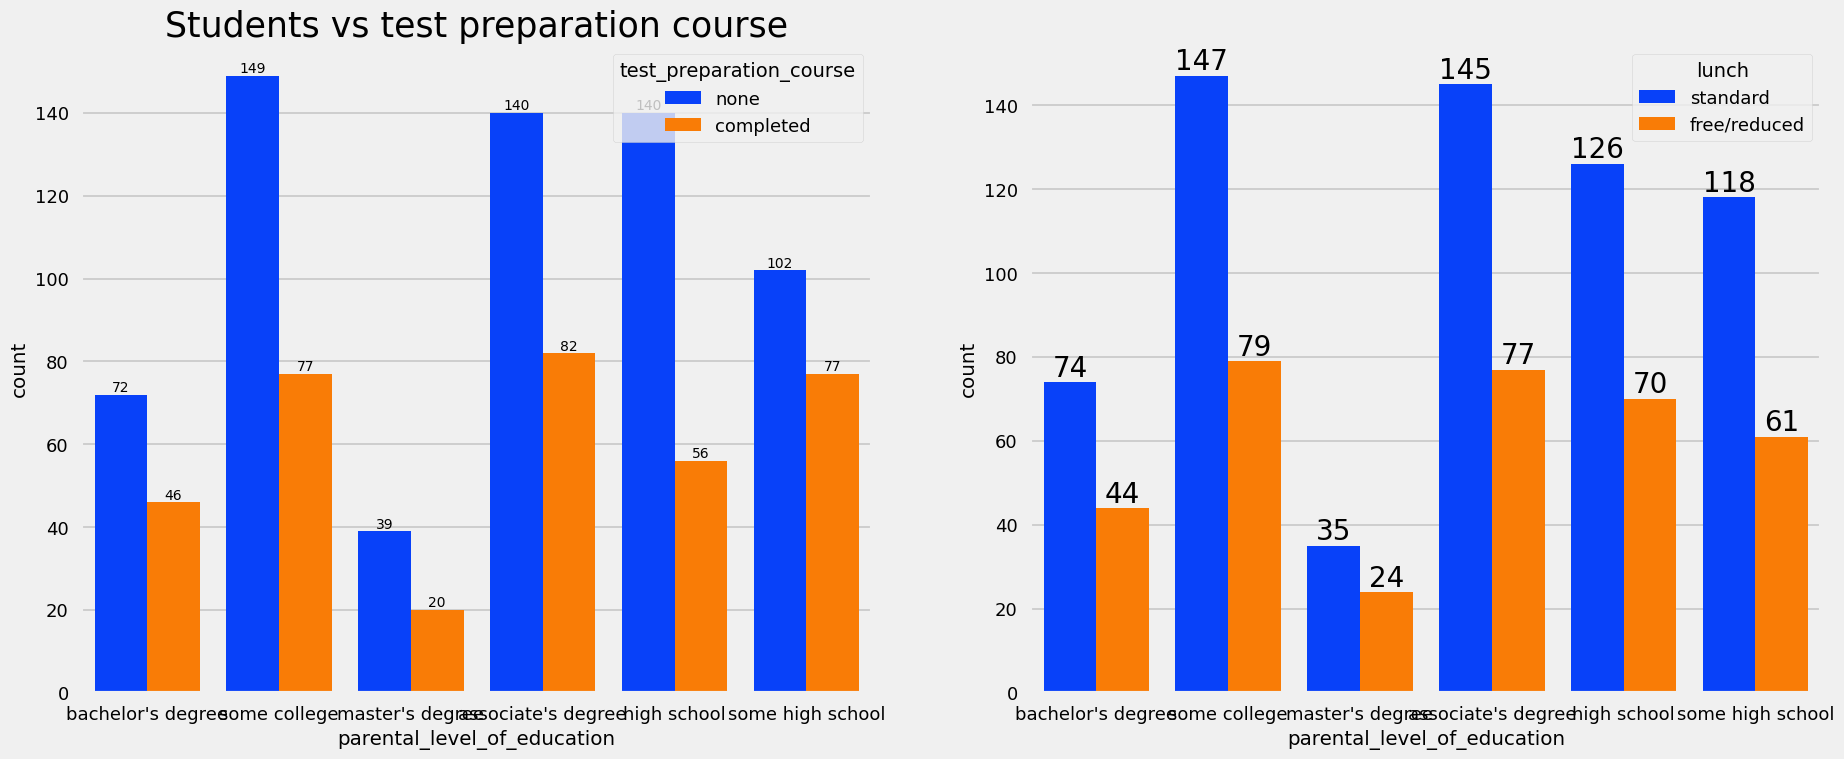

In [106]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=df['parental_level_of_education'], data = df, palette='bright', hue= 'test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size=10)

sns.countplot(x =df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

**Insights**
- Student who get Standard Lunch tend to perform better than students who got free_reduced lunch. 

#### 4.4.5 Test Preparation Course Column
- Which type of lunch is most common amoung students?
- Is Test prepration course has any impact on student's performance?

### Bivariate Analysis (Is Test prepration course has any impact on student's performance?)

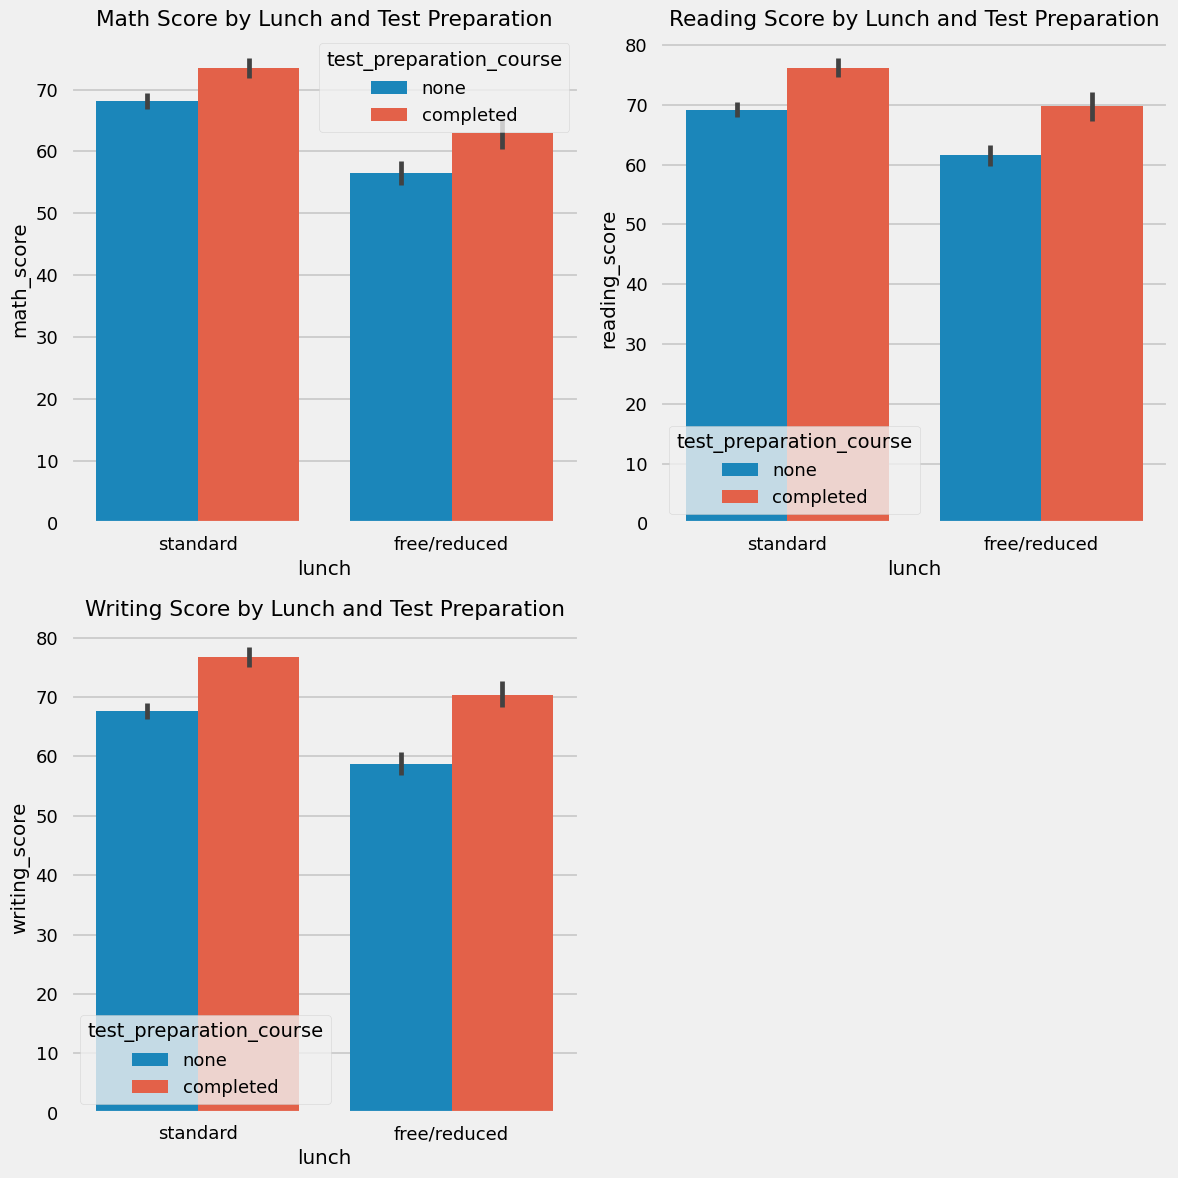

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

# First subplot: Math Score
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title('Math Score by Lunch and Test Preparation')

# Second subplot: Reading Score
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title('Reading Score by Lunch and Test Preparation')

# Third subplot: Writing Score
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title('Writing Score by Lunch and Test Preparation')

plt.tight_layout()
plt.show()

**Insights**
- Students who have completed the Test prepration course higher in all three categories than who haven't taken the course. 

#### 4.4.6 Checking Outliers 

In [111]:
plt.subplot(1, 4, figsize=(16, 5))
plt.subplot(1, 4, 1)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(1, 4, 2)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(1, 4, 3)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(1, 4, 4)
sns.boxplot(df['average'], color='lightgreen')
plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 1040x715 with 0 Axes>

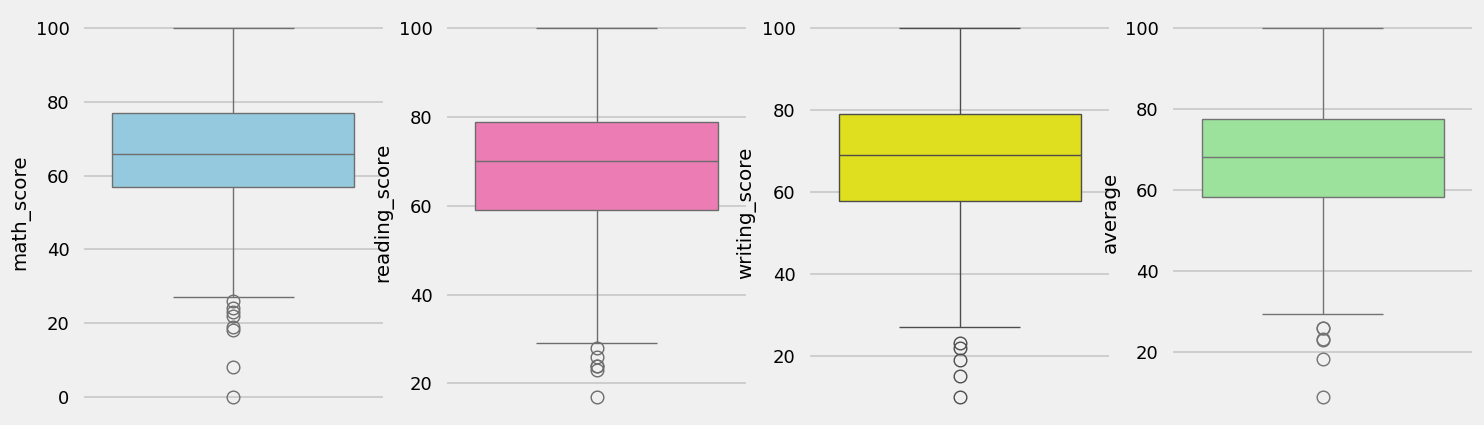

In [112]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 Multivariate Analysis Using Pairplot 

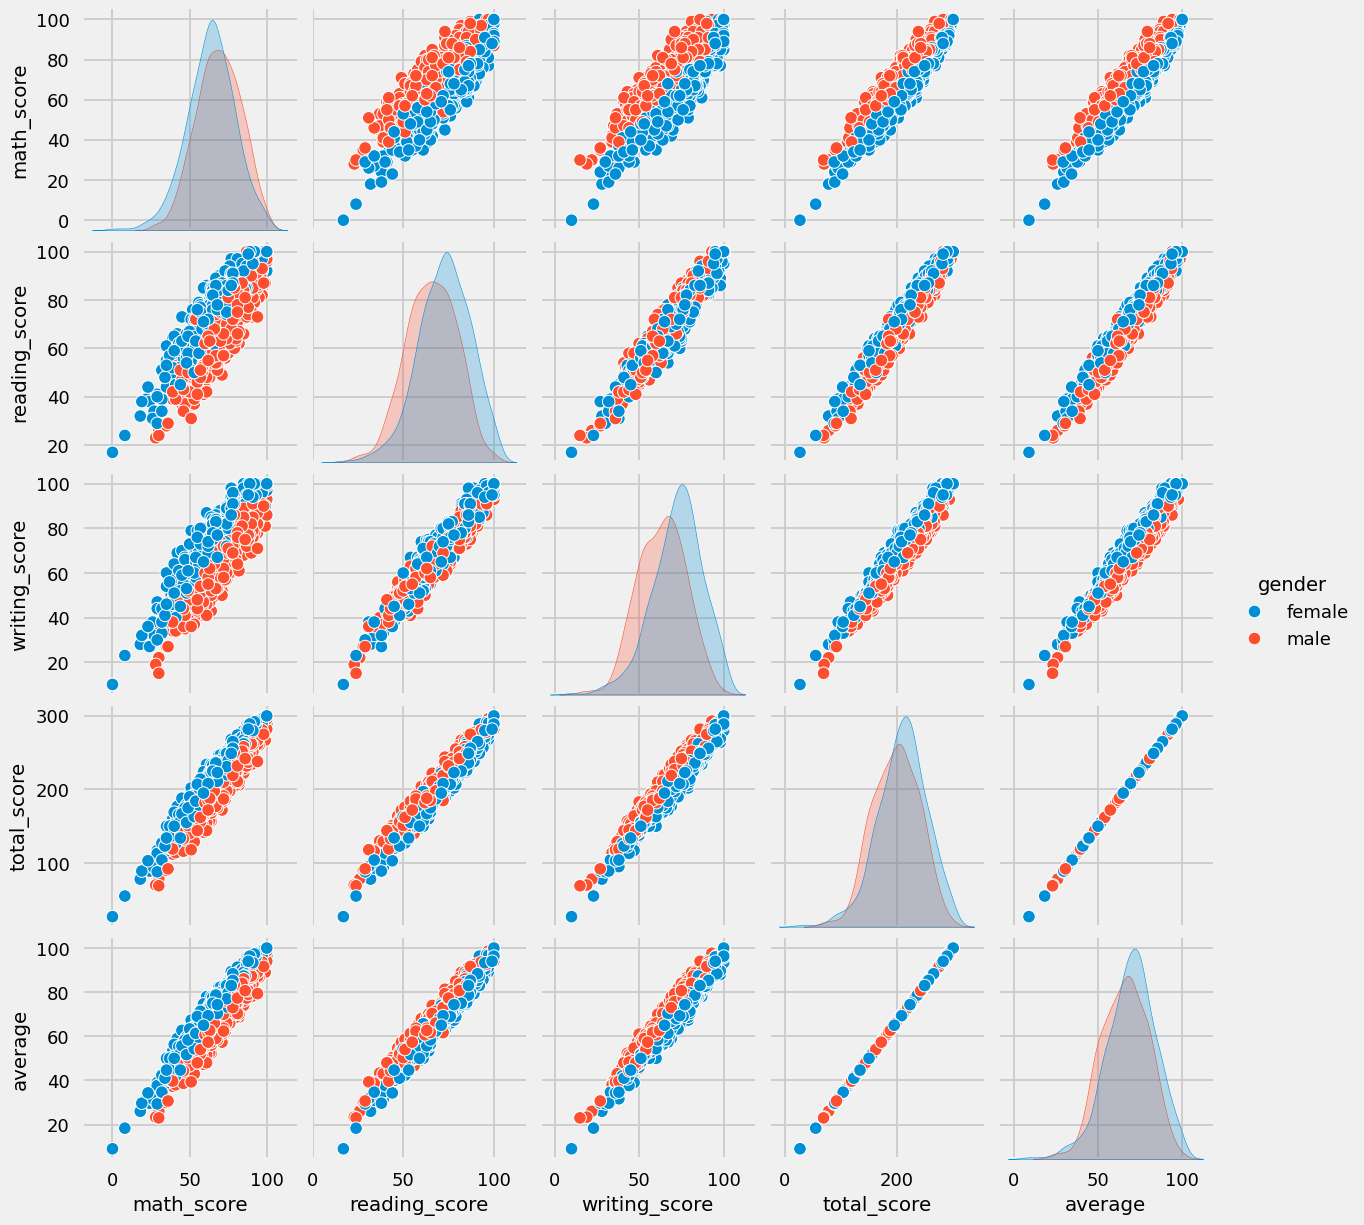

In [117]:
sns.pairplot(df, hue='gender')
plt.show()

**Insights**
- From the above plot it is clear that all scores increase linearly with each other. 

## Conclusions 
- Student's Performance is related with lunch, race, parental level education 
- Females lead in pass percentage and also are top-scores
- Student's Performance is not much related with test preparation course
- Finishing Preparation course is benefitial. 